In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline

CSES MODULE 4 VARIABLES: DEMOGRAPHIC DATA

    D2001_M      >>> D01a    DATE OF BIRTH OF RESPONDENT - MONTH
    D2001_Y      >>> D01b    DATE OF BIRTH OF RESPONDENT - YEAR
    D2002        >>> D02     GENDER
    D2003        >>> D03     EDUCATION
    D2004        >>> D04     MARITAL STATUS
    D2005        >>> D05     UNION MEMBERSHIP OF RESPONDENT
    D2006        >>> D06     UNION MEMBERSHIP OF OTHERS IN HOUSEHOLD
    D2007        >>> D07     BUSINESS OR EMPLOYERS' ASSOCIATION MEMBERSHIP
    D2008        >>> D08     FARMERS' ASSOCIATION MEMBERSHIP
    D2009        >>> D09     PROFESSIONAL ASSOCIATION MEMBERSHIP
    D2010        >>> D10     CURRENT EMPLOYMENT STATUS
    D2011        >>> D11     MAIN OCCUPATION
    D2012        >>> D12     SOCIO ECONOMIC STATUS
    D2013        >>> D13     EMPLOYMENT TYPE - PUBLIC OR PRIVATE
    D2014        >>> D14     INDUSTRIAL SECTOR
    D2015        >>> D15     SPOUSE: CURRENT EMPLOYMENT STATUS
    D2016        >>> D16     SPOUSE: OCCUPATION
    D2017        >>> D17     SPOUSE: SOCIO ECONOMIC STATUS
    D2018        >>> D18     SPOUSE: EMPLOYMENT TYPE - PUBLIC OR PRIVATE
    D2019        >>> D19     SPOUSE: INDUSTRIAL SECTOR
    D2020        >>> D20     HOUSEHOLD INCOME
    D2021        >>> D21a    NUMBER IN HOUSEHOLD IN TOTAL
    D2022        >>> D21b    NUMBER OF CHILDREN IN HOUSEHOLD UNDER AGE 18
    D2023        >>> D21c    NUMBER IN HOUSEHOLD UNDER AGE 6
    D2024        >>> D22     RELIGIOUS SERVICES ATTENDANCE
    D2025        >>> D23     RELIGIOSITY
    D2026        >>> D24     RELIGIOUS DENOMINATION
    D2027        >>> D25     LANGUAGE USUALLY SPOKEN AT HOME
    D2028        >>> D26     REGION OF RESIDENCE
    D2029        >>> D27     RACE
    D2030        >>> D28     ETHNICITY
    D2031        >>> D29     RURAL OR URBAN RESIDENCE
    D2032        >>> D30     PRIMARY ELECTORAL DISTRICT
    D2033        >>> D31     COUNTRY OF BIRTH
    D2034        >>> D32     YEAR ARRIVED IN CURRENT COUNTRY

In [2]:
cses = pd.read_csv('cses4_cut.csv')

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
cses.head()

,Unnamed: 0,D2002,D2003,D2004,D2005,D2006,D2007,D2008,D2009,D2010,D2011,D2012,D2013,D2014,D2015,D2016,D2017,D2018,D2019,D2020,D2021,D2022,D2023,D2024,D2025,D2026,D2027,D2028,D2029,D2030,D2031,age,voted
0,0,1,4,4,2,2,9,9,9,1,422,1,2,3,99,999,9,9,9,3,3,0,99,9,9,8300,121,8,999,999,4,31,True
1,1,2,3,1,2,2,9,9,9,8,999,9,9,9,1,931,2,2,2,1,5,3,99,6,9,1101,121,12,999,999,4,42,True
2,2,2,2,1,2,2,9,9,9,7,818,2,2,2,8,999,9,9,9,9,3,0,99,5,9,1101,121,2,999,999,4,67,True
3,4,2,4,4,2,2,9,9,9,5,513,1,2,3,99,999,9,9,9,9,7,2,99,9,9,8300,121,2,999,999,4,26,False
4,5,1,6,4,1,1,9,9,9,1,235,1,1,3,99,999,9,9,9,5,2,0,99,1,9,1101,121,2,999,999,4,55,True


In [4]:
cses.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
cses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12451 entries, 0 to 12450
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   D2002   12451 non-null  int64
 1   D2003   12451 non-null  int64
 2   D2004   12451 non-null  int64
 3   D2005   12451 non-null  int64
 4   D2006   12451 non-null  int64
 5   D2007   12451 non-null  int64
 6   D2008   12451 non-null  int64
 7   D2009   12451 non-null  int64
 8   D2010   12451 non-null  int64
 9   D2011   12451 non-null  int64
 10  D2012   12451 non-null  int64
 11  D2013   12451 non-null  int64
 12  D2014   12451 non-null  int64
 13  D2015   12451 non-null  int64
 14  D2016   12451 non-null  int64
 15  D2017   12451 non-null  int64
 16  D2018   12451 non-null  int64
 17  D2019   12451 non-null  int64
 18  D2020   12451 non-null  int64
 19  D2021   12451 non-null  int64
 20  D2022   12451 non-null  int64
 21  D2023   12451 non-null  int64
 22  D2024   12451 non-null  int64
 23  D2025   124

There are no missing values

### One-Hot-Encoding Categorical values

In [6]:
dummy_cols=['D2002','D2003','D2004','D2005','D2006','D2007','D2008','D2009','D2010','D2011','D2012','D2013',
'D2014','D2015','D2016','D2017','D2018','D2019','D2024','D2025','D2026','D2027','D2028','D2029','D2030','D2031']
cses_dummy = pd.get_dummies(cses, columns=dummy_cols)

In [7]:
cses_dummy.head()

,D2020,D2021,D2022,D2023,age,voted,D2002_1,D2002_2,D2003_1,D2003_2,D2003_3,D2003_4,D2003_5,D2003_6,D2003_7,D2003_8,D2003_9,D2003_96,D2003_97,D2003_98,D2003_99,D2004_1,D2004_2,D2004_3,D2004_4,D2004_7,D2004_8,D2004_9,D2005_1,D2005_2,D2005_7,D2005_8,D2005_9,D2006_1,D2006_2,D2006_7,D2006_8,D2006_9,D2007_1,D2007_2,D2007_7,D2007_8,D2007_9,D2008_1,D2008_2,D2008_7,D2008_8,D2008_9,D2009_1,D2009_2,D2009_7,D2009_8,D2009_9,D2010_1,D2010_2,D2010_3,D2010_4,D2010_5,D2010_6,D2010_7,D2010_8,D2010_9,D2010_10,D2010_11,D2010_97,D2010_98,D2010_99,D2011_11,D2011_21,D2011_31,D2011_111,D2011_112,D2011_121,D2011_122,D2011_131,D2011_132,D2011_133,D2011_134,D2011_141,D2011_142,D2011_143,D2011_211,D2011_212,D2011_213,D2011_214,D2011_215,D2011_216,D2011_221,D2011_222,D2011_224,D2011_225,D2011_226,D2011_231,D2011_232,D2011_233,D2011_234,D2011_235,D2011_241,D2011_242,D2011_243,D2011_251,D2011_252,D2011_261,D2011_262,D2011_263,D2011_264,D2011_265,D2011_311,D2011_312,D2011_313,D2011_314,D2011_315,D2011_321,D2011_322,D2011_323,D2011_324,D2011_325,D2011_331,D2011_332,D2011_333,D2011_334,D2011_335,D2011_341,D2011_342,D2011_343,D2011_351,D2011_352,D2011_411,D2011_412,D2011_413,D2011_421,D2011_422,D2011_431,D2011_432,D2011_441,D2011_511,D2011_512,D2011_513,D2011_514,D2011_515,D2011_516,D2011_521,D2011_522,D2011_523,D2011_524,D2011_531,D2011_532,D2011_541,D2011_611,D2011_612,D2011_613,D2011_622,D2011_631,D2011_633,D2011_634,D2011_711,D2011_712,D2011_713,D2011_721,D2011_722,D2011_723,D2011_731,D2011_732,D2011_741,D2011_742,D2011_751,D2011_752,D2011_753,D2011_754,D2011_811,D2011_812,D2011_813,D2011_814,D2011_815,D2011_816,D2011_817,D2011_818,D2011_821,D2011_831,D2011_832,D2011_833,D2011_834,D2011_835,D2011_911,D2011_912,D2011_921,D2011_931,D2011_932,D2011_933,D2011_941,D2011_951,D2011_952,D2011_961,D2011_962,D2011_996,D2011_997,D2011_998,D2011_999,D2012_1,D2012_2,D2012_3,D2012_4,D2012_7,D2012_8,D2012_9,D2013_1,D2013_2,D2013_3,D2013_4,D2013_5,D2013_6,D2013_7,D2013_8,D2013_9,D2014_1,D2014_2,D2014_3,D2014_4,D2014_7,D2014_8,D2014_9,D2015_1,D2015_2,D2015_3,D2015_4,D2015_5,D2015_6,D2015_7,D2015_8,D2015_9,D2015_10,D2015_11,D2015_12,D2015_97,D2015_98,D2015_99,D2016_11,D2016_21,D2016_31,D2016_111,D2016_112,D2016_121,D2016_122,D2016_131,D2016_132,D2016_134,D2016_141,D2016_142,D2016_143,D2016_211,...,D2016_511,D2016_512,D2016_513,D2016_514,D2016_515,D2016_516,D2016_521,D2016_522,D2016_523,D2016_524,D2016_531,D2016_532,D2016_541,D2016_611,D2016_612,D2016_613,D2016_621,D2016_622,D2016_631,D2016_711,D2016_712,D2016_713,D2016_721,D2016_722,D2016_723,D2016_731,D2016_732,D2016_741,D2016_742,D2016_751,D2016_752,D2016_753,D2016_754,D2016_811,D2016_812,D2016_813,D2016_814,D2016_815,D2016_816,D2016_818,D2016_821,D2016_831,D2016_832,D2016_833,D2016_834,D2016_835,D2016_911,D2016_912,D2016_921,D2016_931,D2016_932,D2016_933,D2016_941,D2016_961,D2016_962,D2016_996,D2016_997,D2016_998,D2016_999,D2017_1,D2017_2,D2017_3,D2017_4,D2017_7,D2017_8,D2017_9,D2018_1,D2018_2,D2018_3,D2018_4,D2018_5,D2018_6,D2018_7,D2018_8,D2018_9,D2019_1,D2019_2,D2019_3,D2019_4,D2019_7,D2019_8,D2019_9,D2024_1,D2024_2,D2024_3,D2024_4,D2024_5,D2024_6,D2024_7,D2024_8,D2024_9,D2025_1,D2025_2,D2025_3,D2025_4,D2025_7,D2025_8,D2025_9,D2026_1000,D2026_1101,D2026_1102,D2026_1200,D2026_1201,D2026_1203,D2026_1206,D2026_1208,D2026_1209,D2026_1210,D2026_1211,D2026_1212,D2026_1213,D2026_1214,D2026_1215,D2026_1298,D2026_1299,D2026_1300,D2026_1501,D2026_1502,D2026_1503,D2026_1504,D2026_1599,D2026_1600,D2026_1699,D2026_2000,D2026_3000,D2026_3100,D2026_3200,D2026_4000,D2026_5000,D2026_7100,D2026_7200,D2026_7900,D2026_7901,D2026_8100,D2026_8200,D2026_8300,D2026_9001,D2026_9002,D2026_9003,D2026_9004,D2026_9005,D2026_9006,D2026_9007,D2026_9600,D2026_9997,D2026_9998,D2026_9999,D2027_12,D2027_32,D2027_36,D2027_44,D2027_49,D2027_103,D2027_106,D2027_121,D2027_134,D2027_221,D2027_222,D2027_980,D2027_981,D2027_982,D2027_983,D2027_984,D2027_985,D2027_986,D2027_987,D2027_988,D2027_989,D2027_990,D2027_991,D2027_992,D2027_993,D2027_994,D2027_995,D202

In [8]:
voted_dictionary = {True: 1, False : 0}
cses_dummy['voted'] = cses_dummy['voted'].apply(lambda x: voted_dictionary[x])

In [9]:
X = cses_dummy.drop(['voted'],axis=1)
y = cses_dummy['voted']

### Train-Test-Split Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, random_state=0)

In [11]:
print(X_train.shape)
print(X_test.shape)

(8715, 550)
(3736, 550)


### Modelling without Scaling and Feature Selection

###### Random Forest Classifier

In [12]:
rfc=RandomForestClassifier(random_state=42)

In [13]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [14]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [15]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [16]:
CV_rfc.best_score_

0.8327022375215145

In [17]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='entropy')

In [18]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200,
                       random_state=42)

In [19]:
pred=rfc1.predict(X_test)

In [20]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8482334047109208


### Visualising Results - Confusion Matrix

Text(91.68, 0.5, 'predicted label')

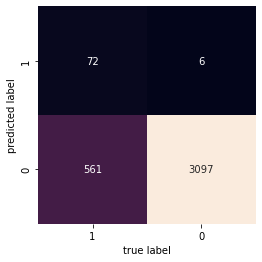

In [21]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=[1,0], yticklabels=[1,0])
plt.xlabel('true label')
plt.ylabel('predicted label')

### Cross Validation

In [22]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(rfc1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f ' % (np.mean(scores)))

Accuracy: 0.839 


### Feature Selection

In [23]:
X_array = X.values
y_array = y.values
X_array = X_array[:]
y_array = y_array[:]

In [24]:
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X_array, y_array)
kscores = fit.scores_
X_new = test.fit_transform(X_array, y_array)

# Features in descending order by score
dicts = {}
dicts=dict(zip(cses_dummy.columns, kscores))
sort_dicts = sorted(dicts.items(), key=lambda x: x[1], reverse=True)

# First 10 features with the highest score
sort_dicts[:10]

[('D2021', 23616.010551455885),
 ('D2022', 9679.99694947531),
 ('D2023', 7728.432886280269),
 ('age', 4588.480589050823),
 ('D2004_3', 567.9176851522903),
 ('D2010_5', 488.1860541958613),
 ('D2014_8', 225.182953263611),
 ('D2013_8', 199.21572514062333),
 ('D2025_8', 181.93018300427522),
 ('D2003_99', 142.86322557527365)]

In [25]:
# First 10 features with the highest score selected

X_selected = cses_dummy[['D2021', 
'D2022', 
'D2023', 
'age', 
'D2004_3', 
'D2010_5', 
'D2014_8', 
'D2013_8', 
'D2025_8', 
'D2003_99']]

### Modeling with Feature Selection, Without Scaling

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_selected,  y, test_size=0.3, random_state=0)

#### Random Forest Classifier

In [27]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [28]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 200}

In [29]:
rfc2=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=7, criterion='gini')

In [30]:
rfc2.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=42)

In [31]:
pred=rfc2.predict(X_test)

In [32]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8645610278372591


#### Visualization - Confusion Matrix

Text(91.68, 0.5, 'predicted label')

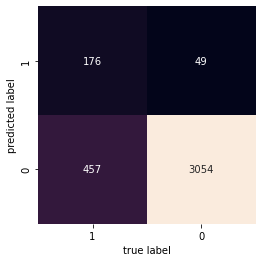

In [33]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=[1,0], yticklabels=[1,0])
plt.xlabel('true label')
plt.ylabel('predicted label')

#### Cross Validation

In [34]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(rfc2, X_selected, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f ' % (np.mean(scores)))

Accuracy: 0.858 


#### KNeighborsClassifier


In [35]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

In [36]:
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [37]:
knn = KNeighborsClassifier()

In [38]:
clf = GridSearchCV(knn, hyperparameters, cv=10)

In [39]:
best_model = clf.fit(X_train,y_train)

In [40]:
best_model.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 31,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 27,
 'p': 1,
 'weights': 'uniform'}

In [41]:
knn1 = KNeighborsClassifier(algorithm= 'auto',
 leaf_size= 31,
 metric= 'minkowski',
 metric_params = None,
 n_jobs= None,
 n_neighbors = 27,
 p = 1,
 weights = 'uniform')

In [42]:
knn1.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=31, n_neighbors=27, p=1)

In [43]:
pred=knn1.predict(X_test)

In [44]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8629550321199143


#### Visualization

Text(91.68, 0.5, 'predicted label')

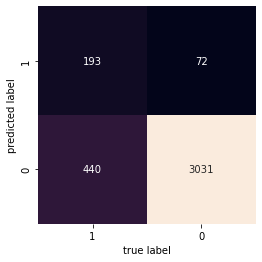

In [45]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=[1,0], yticklabels=[1,0])
plt.xlabel('true label')
plt.ylabel('predicted label')

#### Cross Validation

In [46]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(knn1, X_selected, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f ' % (np.mean(scores)))

Accuracy: 0.857 


### Modeling with Feature Selection and Scaling

In [47]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('classifier', RandomForestClassifier())])

In [48]:
search_space = [
                {'classifier': [RandomForestClassifier(n_estimators=100)],
                 'classifier__max_depth': [5, 10, None]},
                {'classifier': [KNeighborsClassifier()],
                 'classifier__n_neighbors': [3, 7, 11],
                 'classifier__weights': ['uniform', 'distance']}
               ]

In [49]:
clf = GridSearchCV(pipe, search_space, cv=10, verbose=0)
clf = clf.fit(X_selected, y)

In [50]:
clf.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(max_depth=5))])

In [51]:
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 RandomForestClassifier(max_depth=5))],
         verbose=False)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(max_depth=5))])

In [52]:
clf.best_score_

0.8252327447833065

In [53]:
rfc2=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=5, criterion='entropy')

In [54]:
rfc2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42)

In [55]:
pred=rfc2.predict(X_test)

In [56]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8632226980728052


### Visualizing Results - Confusion Matrix

Text(91.68, 0.5, 'predicted label')

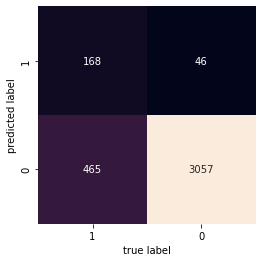

In [57]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=[1,0], yticklabels=[1,0])
plt.xlabel('true label')
plt.ylabel('predicted label')

### Cross Validation

In [58]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(rfc2, X_selected, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.856 (0.011)
